# What is a Differential Equation (DE) and Why Do We Care?

Notes for future additions.
Add notes on Hodgkin Huxley and foreshadow why DEs are important.
Memory decay. Neuron models.
plot an exponential
compound interest
plot compound interest - what looks similar/why.
Discuss solving a de - by equation, analytically - but don't do it now. Come back to it. 

## Questions
   1. What does the abbreviation stand for?
   2. What are they?
   3. What good are they?
   4. What are the notations for a *derivative*?
   

## Answers :noexport:
   1. Differential Equations
   2. An equation with a derivative
   3. Incorporating rates of changes to update estimates of a state. Consider estimating location from a velocity. 

## Derivative Notations
      

$$\frac{dy}{dx}$$
$$\dot{x}$$
$$x'$$
$$f'(x)$$

## Questions

   1. What is a cube root?
   2. In your head guess the square root of 128.
   3. Write a formula that would allow me to compute the error (or how far off you were).
   4. How much should you adjust your guess to get closer to the correct answer?
   5. What is the derivative of $x^3$? Use the formula.
   6. Using this derivative make an estimate of how much you need to change your guess, and give a reason why this should work graphically.
   7. What happens to the sign of the "adjustment" when our guesses go from giving us to big an answer to too little an answer.


## Answers :noexport:

   1. The solution to $y = x^3$.
      
      This is what I will have them code, but for the example might be better to stick with what is in the book. Might talk about what it means to be a "solution." And also might point out the similarity to regression equations and dependent and independent variables. Helps them see they sort of already "know" this stuff. Could try to elicit this as a question. For answers they could talk about fixing "y" or we could see how we want the two sides to be equal, and this means if we subtract one from the other the difference (sounds like differential; sounds like derivative) should be zero.
      - Terminology
	+ finding the roots
	+ finding the zeros

   2. 

   3. $\mbox{Error} = \mbox{(my guess)}^2 - \mbox{128}$; get someone to come write it up on the board.

   4. test

      #+Begin_Src python :results file :exports both

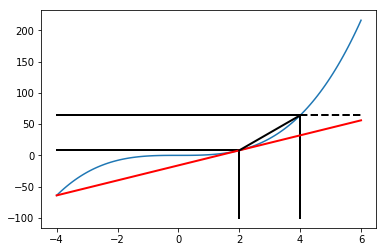

In [3]:
%matplotlib inline

import matplotlib, numpy
a = numpy.linspace(-4,6,num=120)
b = [x**3 for x in a];#list comprehension
import matplotlib.pyplot as p
p.plot(a,b)
p.plot([2,2],[-100,8], 'k-',lw=2)
p.plot([-4,2],[8,8], 'k-',lw=2)
p.plot([4,4],[64,-100], 'k-',lw=2)
p.plot([-4,6],[-64,56], 'r-',lw=2)
p.plot([-4,4],[64,64], 'k-',lw=2)
p.plot([4,6],[64,64], 'k--',lw=2)
p.plot([2,4],[8,64], 'k-',lw=2)

In [ ]:
   5. Need them to see it as slope. Rise over run. Can now try to help them see how if you shrink the run to 0 you get the slope at a point. This gives us a way to compute derivatives.

   6. 

   7. $\frac{\Delta~\mbox{Error}}{\Delta~\mbox{Guess}} = \frac{\mbox{Error(Guess1) - Error(Guess0)}}{\mbox{Guess1} - \mbox{Guess0}}$
## Explorations 
   :Properties:
   :CUSTOM_ID: explorations
   :End:

   1. Explorations can often start by drawing or sketching. Never underestimate the utility of trying to graph or visualize the problem.
   2. Open up [[file:ch2Explore.ods][spreadsheet]]
   3. Insert a formula for error of square root of 128
      
      How to specify a formula

      ~$~ freezes column and row references.

      How you get more flexibility by using references (variables) rather than ~hard coding~.

   4. Class activity. Make a spreadsheet that finds the cube root of any number.

   5. Same thing in Python


   #+BEGIN_SRC python :session *newton# :results value :exports both

### Cube Root Script Python

In [8]:
import pandas as pd

guesses = [5.0]
errors = [10000]
tolerance = 0.01
    
def cube (x):
    return x**3

def derivCube (x):
    return 3*x**2

while (abs(errors[-1]) > tolerance):
    errors.append(128 - cube(guesses[-1]))
    guesses.append(errors[-1]/derivCube(guesses[-1]) + guesses[-1])

print(pd.DataFrame({'errors':errors,'guesses':guesses}))

         errors   guesses
0  10000.000000  5.000000
1      3.000000  5.040000
2     -0.024064  5.039684
3     -0.000002  5.039684


### Standalone Cube Root Program

In [10]:
def cube (x):
    return x**3

def derivCube (x):
    return 3*x**2

def cubeRoot(n,initGuess = 5.0):
    guesses = [initGuess]
    errors = [10000.0]
    tolerance = 0.01
    i = 0
#    while not (errors[-1] < tolerance):
    while (abs(errors[-1]) > tolerance):
        curError = n - cube(guesses[-1])
#        print("curError = %f" % curError)
        errors.append(curError)
        newGuess = errors[-1]/derivCube(guesses[-1]) + guesses[-1]
#       print ("newGuess = %f" % newGuess)
        guesses.append(newGuess)

    return(guesses[-1])

def main():
    testNum = input("Cube root of ?\n")
    print ("Answer is: %f\n" % cubeRoot(float(testNum)))

if __name__ == "__main__":
    main()

Cube root of ?
64
Answer is: 4.000000



# Intermission Github

## A way to share code or anything - e.g. text/doc files
 
   1. No cost if public. For private you might have to pay.
   2. Uses =git=. Don't have to use [github](https://github.com/) to use [git tutorial](https://www.atlassian.com/git/tutorials/) (note Bitbucket is another option for free hosting). I mostly use a machine in my office as the main site of my repositories, e.g. for these notes, and then I just ~clone~ them on to a new laptop if needed.
   3. There are other programs for doing this.
   4. Let's get everyone's feet wet.
   5. You can have your own website there using [jekyll](http://jekyllrb.com/)
   6. Again, you don't have to use github to use Jekyll. I use Jekyll for the [brittlab](https://brittlab.uwaterloo.ca) which is hosted on a University computer.
   7. There can be a steep learning curve, but it is hard to do any permanent damage. Sometimes files look like they disappear, but they are still there. In fact it is harder to irreversibly delete stuff from a git repo than on a regular set up, and if you have a repo you have a back-up.
   

# Using a Differential Equation to Iterate

  - Harken back to the travel example. To know where I will be I can estimate from where I am now and how fast my position is changing.
  - A derivative is a rate of change. See the derivative from the cube root example. We can see how the error is changing as we change the independent variable, and use that to help us find out where we want to be.

## Springs
   
   Before we go to the more advanced usage of the spiking models. Let's try something where me might have a little more physical intuition. 

   The equation [fn:parantheses] for the spring came from empirical observations. Just as the Hodgkin-Huxley model of the neuron that we will work up to. 

\begin{equation} 
\frac{d^2s}{dt} = -Ps(t) 
\end{equation}

### Begin with a spreadsheet

### Try it with code

#+INCLUDE: "./spring.hs" src haskell

#+BEGIN_SRC sh :export code :results none
runhaskell ./spring.hs
#+END_SRC


#+Name: spring.png
#+Caption: Oscillation output of Haskell Spring Code
[[./spring.png]]

# Assignment
  1. Sign-up for a github account
  2. Clone the course repo.
  3. Submit (in the dropbox to be created) a screenshot or some documentation that you did the above.
  4. If you submit something to the repository, a recipie for how to do something, a snippet of code that works, a list of links to helpful sites, anything that you think might help me or your classmates, and I accept it, then I will give you some extra-credit.
  5. Submit into the dropbox /either/ a spreadsheet program to compute the solution for $x^3 + x^2$ or a small computer program in any language of your choice.

   
[fn:parantheses] Note this is *not# s multiplied by t, but s as a function of t.